# 14/10/2020

## Convolution

### Objectives

* know how to use the function `scipy.ndimage.convolve` to apply the convolution product
* be able to identify the kernel applied on a convolved image

Before convolving the image by the different filters, it is interesting to display the filter itself.
In case we do not have the matrix representing this filter (like with the Gaussian filter `skimage.filters.gaussian`),
we can simply convolve the filter by an image containing only one non-zero pixel.
Indeed, this image is equivalent to a Dirac pulse $\delta$ which is the neutral element of the convolution product.

The two last kernels are defined with:

In [1]:
h = np.array([[1, -1]])

NameError: name 'np' is not defined

and

In [2]:
N = 30
h = np.ones((1,N)) / N

NameError: name 'np' is not defined

The results of the convolutions are shown below, for both the "Dirac pulse" and the smiley.

In [3]:
import skimage as ski
import skimage.io as io
import skimage.filters as filters
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [4]:
# Filtres à appliquer

def identity(f):
    return f

def gauss(f):
    return filters.gaussian(f,4)

def diff(f):
    h = np.array([[1, -1]])
    return sp.ndimage.convolve(f, h)

def mouv(f):
    N = 30 # longueur du filtre
    h = np.ones((1,N)) / N
    return sp.ndimage.convolve(f, h)

def duplicate(f):
    h = np.zeros((10,1))
    h[0,] = 1
    h[9,] = 1
    return sp.ndimage.convolve(f, h)

# Dictionnaire des convolutions
convs = {
    "Image": identity,
    "Gaussian blur": gauss,
    "Gradient": diff,
    "Motion blur": mouv,
    #"Dédoublement": duplicate
}

K = len(convs)

In [5]:
# Images

# Dirac
img1 = np.zeros((100,100))
img1[50,50] = 1

# Smiley
img2 = io.imread('smiley.png')
img2 = ski.img_as_float(img2)

# Liste des images
images = [img1, img2]

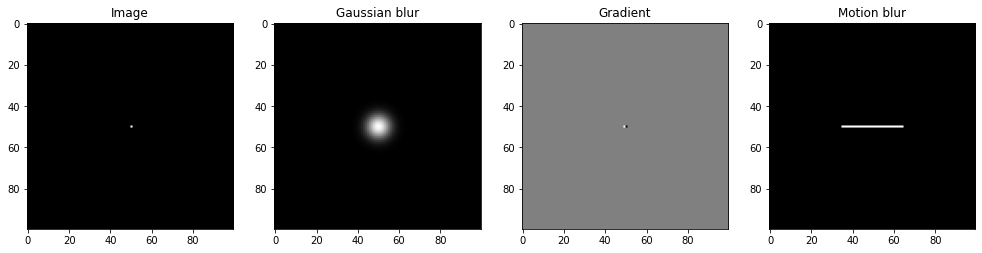

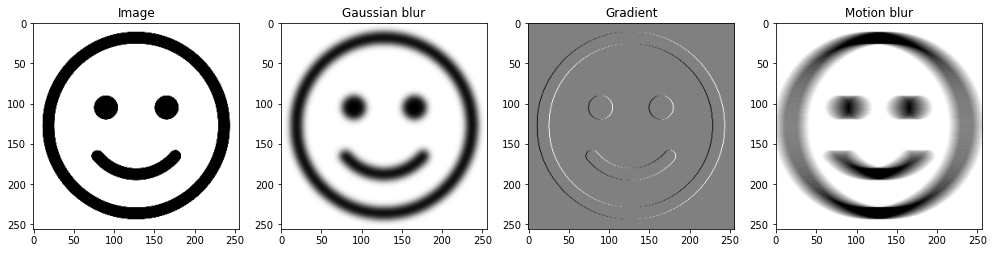

In [6]:
# Convolutions

# Boucle sur les images
for f in images:
    
    # Nouvelle figure
    plt.figure(figsize=(17,10))
    i = 0
    
    # Boucle sur les convolution
    for name,c in convs.items():

        i = i + 1
        plt.subplot(1,K,i)
        plt.imshow(c(f), cmap="gray");
        plt.title(name)

The function `skimage.filters.gaussian` defines a Gaussian kernel (this is the second image above).
he result of the function is the convolution product of this Gaussian kernel with the image given as a parameter of the function.

The "gradient" image brings out the vertical contours of the image.
We will reuse such a filter in the course on edge detection.

## Properties of the Fourier transform

### Objectives
* manipulation of `fft2` et `fftshift`
* display adequatly the magnitude of the Fourier transform to see the details
* observe the effect of a contraction-dilation
* observe the effect of a rotation
* observe the effect of a translation

In [1]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

Quelques notes :
* Après avoir calculé la transformée de Fourier de l'image avec `numpy.fft.fft2`,
  utilisez la fonction `numpy.fft.fftshift` pour décaler les fréquences nulles au centre de l'image.
* La transformée de Fourier étant à valeurs complexes, on ne peut la
  tracer directement : il faut donc afficher son module (`numpy.absolute`) et sa phase (`numpy.angle`).
* Les intensités du modules sont « écrasées » par l'intensité de la fréquence nulle, qui est très grande.
  Pour obtenir un affichage lisible, il faut appliquer une transformation d'histogramme sur le module,
  par exemple avec `numpy.log`.

In [2]:
# Supprime les warnings indiquant les log(0)
#import warnings
#warnings.filterwarnings('ignore')

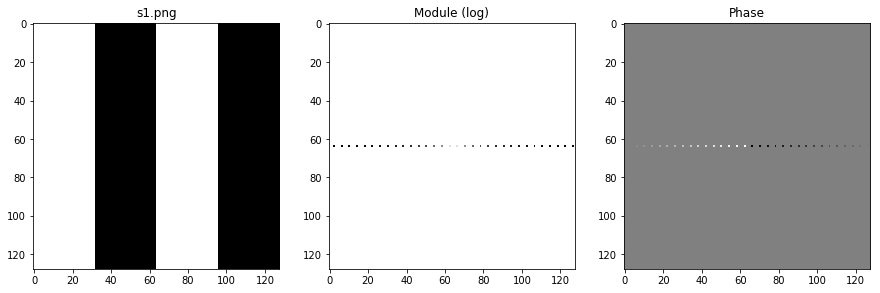

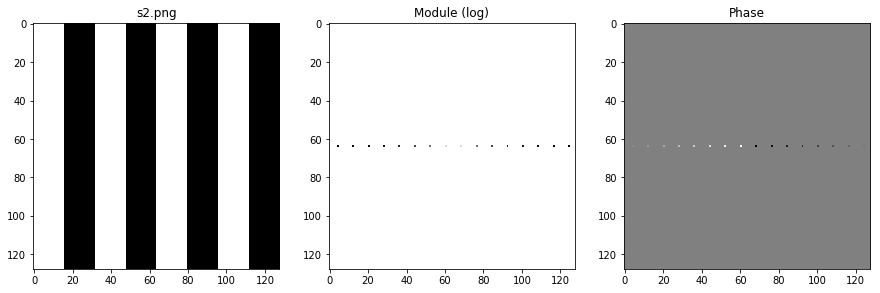

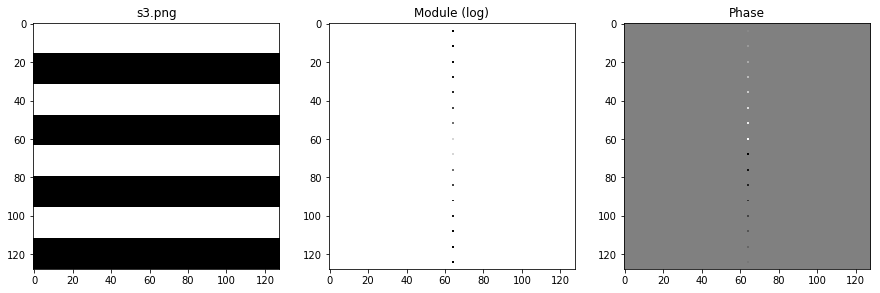

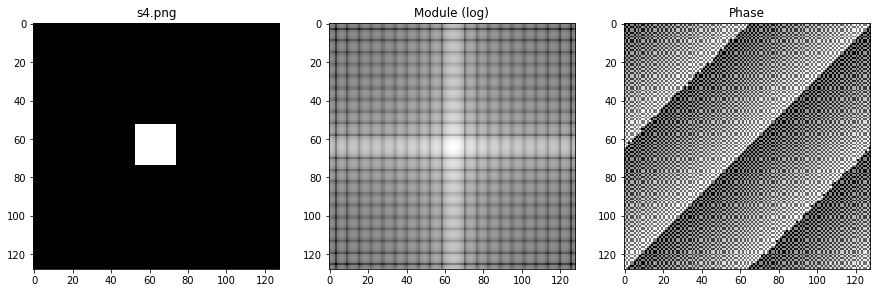

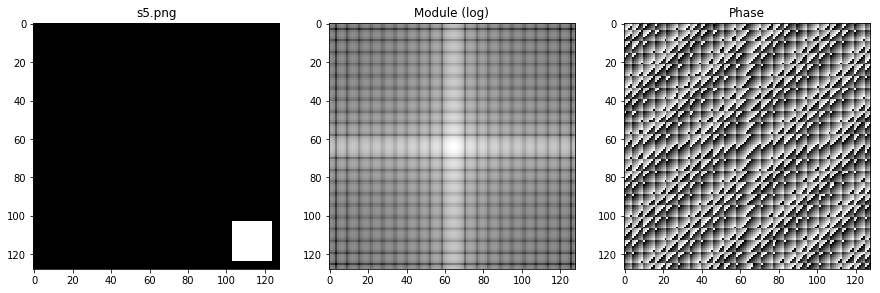

In [3]:
for i in range(5):
    
    # Chargement
    img = "s%d.png" % (i+1)
    f = io.imread(img)

    # Transformée de Fourier
    F = np.fft.fft2(f);
    
    # Ramener les basses fréquences au centre de l'image
    F = np.fft.fftshift(F)
    
    # Affichage
    # Pensez à afficher le logarithme du module afin de voir quelque chose
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.imshow(f, cmap="gray")
    plt.title(img)
    plt.subplot(1,3,2)
    plt.imshow(np.log(np.absolute(F)), cmap="gray")
    plt.title("Module (log)")
    plt.subplot(1,3,3)
    plt.imshow(np.angle(F), cmap="gray")
    plt.title("Phase")
    

Cet exercice a permis notamment de mettre en évidence quelques propriétés de la transformée de Fourier.

* Ainsi, les images `s1` et `s2` illustrent le fait qu'une « contraction » dans le domaine spatial
  (entre `s1` à `s2` les bandes se rapprochent et deviennent plus étroites)
  se traduit par une « dilatation » dans le domaine fréquentiel
  (les points s'écartent, mais le motif reste globalement le même, que ce soit sur le module ou la phase).
* Une rotation dans le domaine spatial (la différence entre les images `s2` et `s3` est une rotation de 90°)
  se traduit par une rotation identique dans le domaine fréquentiel.
* Lorsque l'image est décalée spatialement (le carré blanc des images
  `s4` et `s5` a été translaté), seule la phase de la transformée de Fourier est modifiée :
  on parle de _déphasage_.


Outils fondamentaux en traitement d'images – Université de Strasbourg 2019 – [vincent.mazet@unistra.fr](mailto:vincent.mazet@unistra.fr)

## TP 1 – exercice 8 : propriétés de la transformée de Fourier

Les objectifs de cet exercice sont : 
* la manipulation des fonctions `fft2` et `fftshift`
* l'affichage du module d'une transformée de Fourier, de façon à y voir quelque chose
* d'observer l'effet de contraction-dilatation
* d'observer l'effet de rotation
* d'observer l'effet de translation

In [1]:
# hide
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

Quelques notes :
* Après avoir calculé la transformée de Fourier de l'image avec `numpy.fft.fft2`,
  utilisez la fonction `numpy.fft.fftshift` pour décaler les fréquences nulles au centre de l'image.
* La transformée de Fourier étant à valeurs complexes, on ne peut la
  tracer directement : il faut donc afficher son module (`numpy.absolute`) et sa phase (`numpy.angle`).
* Les intensités du modules sont « écrasées » par l'intensité de la fréquence nulle, qui est très grande.
  Pour obtenir un affichage lisible, il faut appliquer une transformation d'histogramme sur le module,
  par exemple avec `numpy.log`.

In [2]:
# hide
# Supprime les warnings indiquant les log(0)
import warnings
warnings.filterwarnings('ignore')

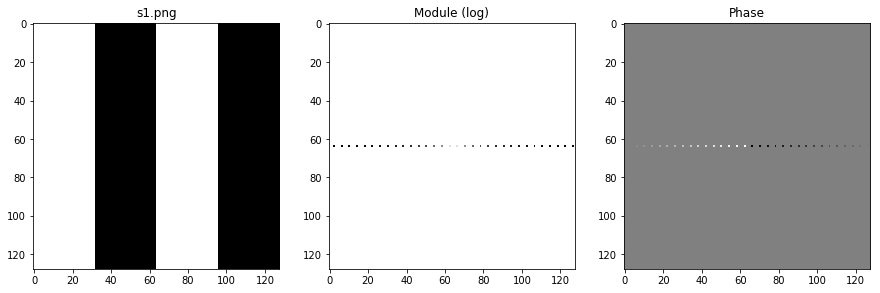

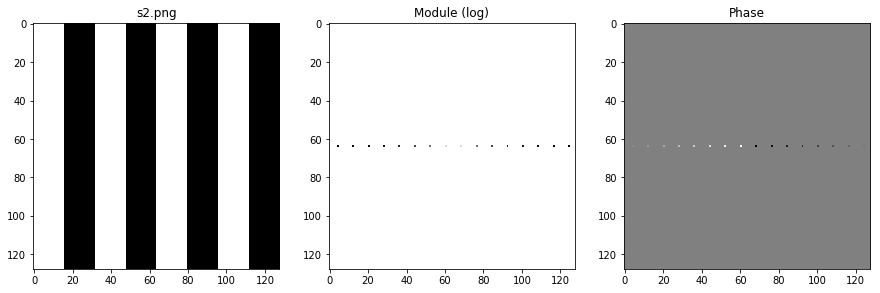

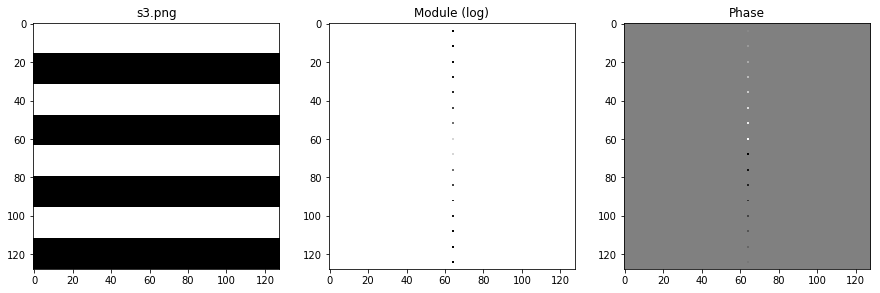

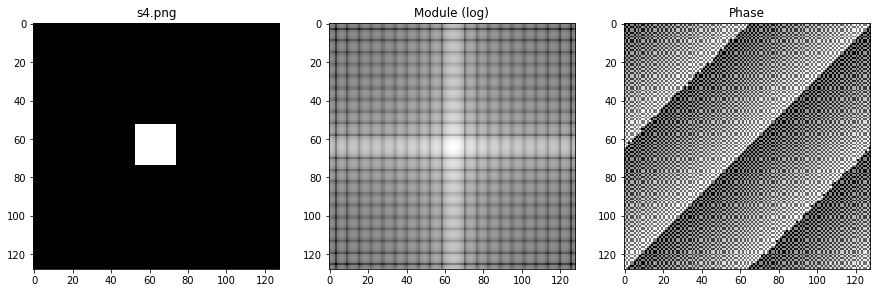

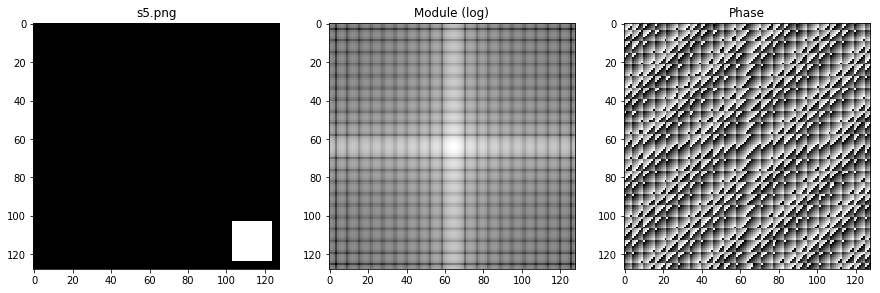

In [3]:
# hide
for i in range(5):
    
    # Chargement
    img = "s%d.png" % (i+1)
    f = io.imread(img)

    # Transformée de Fourier
    F = np.fft.fft2(f);
    
    # Ramener les basses fréquences au centre de l'image
    F = np.fft.fftshift(F)
    
    # Affichage
    # Pensez à afficher le logarithme du module afin de voir quelque chose
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.imshow(f, cmap="gray")
    plt.title(img)
    plt.subplot(1,3,2)
    plt.imshow(np.log(np.absolute(F)), cmap="gray")
    plt.title("Module (log)")
    plt.subplot(1,3,3)
    plt.imshow(np.angle(F), cmap="gray")
    plt.title("Phase")
    

Cet exercice a permis notamment de mettre en évidence quelques propriétés de la transformée de Fourier.

* Ainsi, les images `s1` et `s2` illustrent le fait qu'une « contraction » dans le domaine spatial
  (entre `s1` à `s2` les bandes se rapprochent et deviennent plus étroites)
  se traduit par une « dilatation » dans le domaine fréquentiel
  (les points s'écartent, mais le motif reste globalement le même, que ce soit sur le module ou la phase).
* Une rotation dans le domaine spatial (la différence entre les images `s2` et `s3` est une rotation de 90°)
  se traduit par une rotation identique dans le domaine fréquentiel.
* Lorsque l'image est décalée spatialement (le carré blanc des images
  `s4` et `s5` a été translaté), seule la phase de la transformée de Fourier est modifiée :
  on parle de _déphasage_.


Outils fondamentaux en traitement d'images – Université de Strasbourg 2019 – [vincent.mazet@unistra.fr](mailto:vincent.mazet@unistra.fr)

## TP 5 – exercice 2 : compression d'image avec perte

In [1]:
import scipy
print(scipy.__version__)

1.1.0


In [1]:
import warnings
warnings.filterwarnings("ignore")

Les objectifs de cet exercice sont : 
* de savoir mettre en oeuvre le principe de base de la compression JPEG
* d'utiliser la transformée en cosinus discrète
* d'analyser l'effet de la compression sur la qualité visuelle et le PSNR

In [2]:
from math import pi, log10

from numpy import zeros, log, absolute, linspace, meshgrid, count_nonzero, round
from numpy.linalg import norm

from scipy.fftpack import dctn, idctn

from skimage.io import imread
from skimage.color import rgb2gray

from matplotlib.pyplot import figure, imshow, show, subplot, title, plot, xlabel, ylabel #, , , show, plot, axis, axis

### Images de base de la DCT

Avant de commencer, il est intéressant d'afficher les images de base de la DCT.

Puisque les images de la base correspondent à un unique coefficient non nul dans le domaine de la transformée, une solution pour afficher ces images est de créer des images nulles dans le domaine de la transformée, sauf en un seul pixel. La fonction `scipy.fftpack.idctn` permet alors de représenter le cosinus 2D correspondant. Les basses fréquences se situent en haut à gauche.

Voici quelques exemples d'images de la base (sur la première ligne) et de leur DCT (sur la seconde ligne) pour une taille de 8×8 pixels.

In [3]:
# Pour afficher toute la base
# i = 0
# figure(figsize=(15,15))
# for r in range(8):
#     for c in range(8):
#         i += 1
#         X = zeros((8,8))
#         X[r,c] = 1
#         x = idctn(X)
#         subplot(8,8,i)
#         imshow(x, cmap="gray")

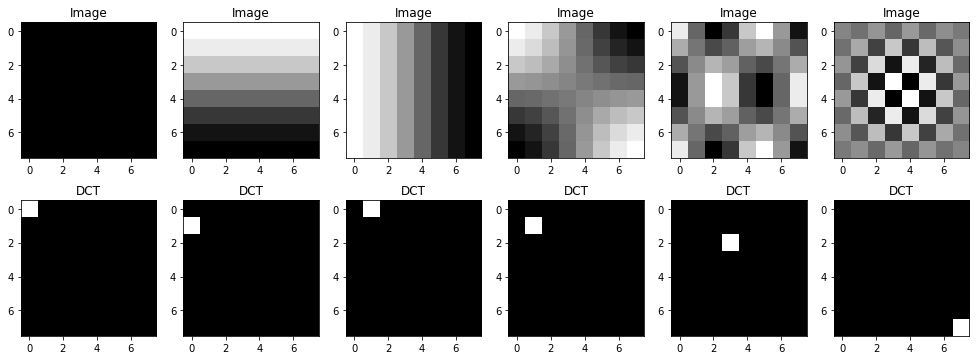

In [4]:
# Pixels (dans le domaine de la DCT) à considérer
px = ( (0,0), (1,0), (0,1), (1,1), (2,3), (7,7) )
I = len(px)

figure(figsize=(17,6))

for i, p in enumerate(px):
    
    # DCT (nulle partout sauf au pixel p)
    X = zeros((8,8))
    X[p] = 1
    
    # DCT inverse (ne pas oublier l'option norm='ortho' !)
    x = idctn(X, norm='ortho')
    
    # Affichage de l'image de la base
    subplot(2,I,i+1)
    imshow(x, cmap='gray')
    title('Image')
    
    # Affichage de la DCT
    subplot(2,I,i+I+1)
    imshow(X, cmap='gray')
    title('DCT')

On constate bien que les pixels en haut à gauche de la DCT (proches de l'origine, donc) correspondent à une fréquence basse puisqu'ils se traduisent par un cosinus bidimensionnel de basse fréquence dans le domaine spatial. À l'inverse, le pixel en bas à droite est la composante très haute fréquence : l'intensité des pixels évolue très vite dans l'image.

### Application du principe JPEG à une image

Pour simplifier, la compression JPEG est appliquée sur une image carrée à niveau de gris.

Contrairement à la transformée de Fourier qui décompose une image sur une base d'exponentielles complexes, la DCT décompose une image sur une base de cosinus réels : le résultat est donc bien réel et il est inutile de distinguer module et phase lors de l'affichage. En revanche, le coefficient de fréquence nulle étant beaucoup plus grand que les autres, le contraste de la DCT est à modifier (comment ?) pour pouvoir la visualiser.

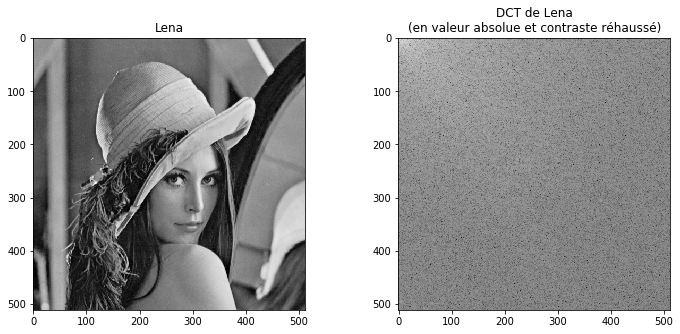

In [5]:
x = imread("lena.tiff")
x = rgb2gray(x)
X = dctn(x, norm='ortho')

figure(figsize=(12,5))
subplot(1,2,1)
imshow(x, cmap="gray")
title('Lena')
subplot(1,2,2)
imshow(log(absolute(X)), cmap='gray')
title('DCT de Lena\n(en valeur absolue et contraste réhaussé)');
show()

On peut remarquer (même si ça ne saute pas aux yeux) que les coefficients de fréquence faible sont plus énergétiques que les autres. Cela signifie que l'image est plutôt composée de basses fréquences.

Pour effectuer la compression, on choisit ici d'annuler les pixels haute fréquence à l'aide d'un masque carré de côté $C$. La taille du carré relativement à celle de l'image correspond au taux de compression.

In [6]:
# Taille (en pixels) du carré utilisé pour le masque
C = 200

# Taille de l'image originale
(M, N) = x.shape

# Taux de compression
taux = (C*C) / (M*N)

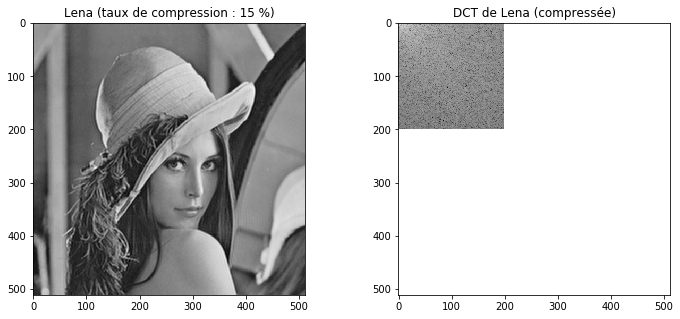

In [7]:
# Copie de la DCT
Y = X
        ###############################
        ###############################
        ###############################
        ###############################
        ###############################
# [Hugo] Attention : Or la copie n'est pas faite sans ".copy()" par exemple:
# Y est juste une référence sur X. Mais c'est sans conséquence dans le code car finalement Y n'est pas modifée

# Masque
Mask = zeros(Y.shape)
Mask[:C,:C] = 1
Z = Y*Mask
z = idctn(Z, norm='ortho')

# Affichage
figure(figsize=(12,5))
subplot(1,2,1)
imshow(z, cmap='gray')
title('Lena (taux de compression : {:.0f} %)'.format(taux*100))
subplot(1,2,2)
imshow(log(absolute(Z)), cmap='gray')
title('DCT de Lena (compressée)');
show()

Avec pourtant un taux de compression très élevé, le résultat visuel est très bon : il est très difficile d'observer des différences entre les deux images. Cette observation est d'ailleurs confirmée par la valeur élevée du PSNR :

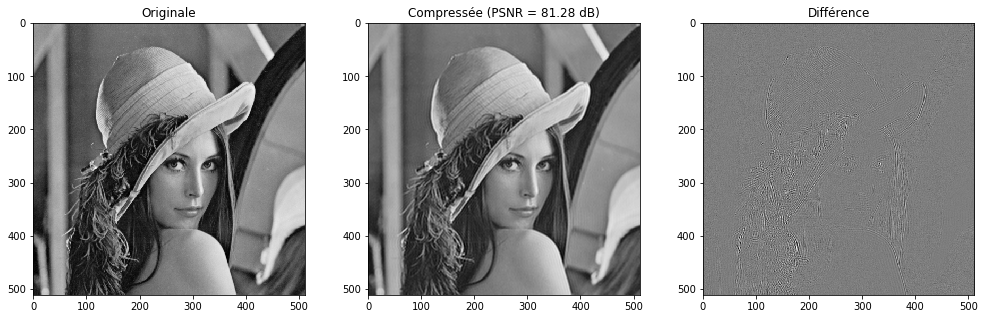

In [8]:
Delta = 255
b = z - x
Pb = norm(b)**2 / (M*N)
PSNR = 10*log10(Delta**2/Pb)

figure(figsize=(17,5))
subplot(1,3,1)
imshow(x, cmap='gray')
title('Originale')
subplot(1,3,2)
imshow(z, cmap='gray')
title('Compressée (PSNR = {:.2f} dB)'.format(PSNR))
subplot(1,3,3)
imshow(b,cmap='gray')
title('Différence')
show()

L'image de différence est intéressante, car on peut voir que les erreurs sont principalement situées dans les zones de l'image qui possèdent des hautes fréquences (contours, plumes du chapeau...). C'est logique puisque c'est justement ces hautes fréquences qui ont été annulées.

Le compression JPEG joue sur le fait que l'oeil humain n'est pas sensible à ces changements à haute fréquence.

###  Évolution du PSNR

La procédure précédente est utilisée pour différentes valeurs de $C$, afin de calculer le PSNR et l'EQM entre l'image compressée et l'image originale.

Text(0, 0.5, 'EQM')

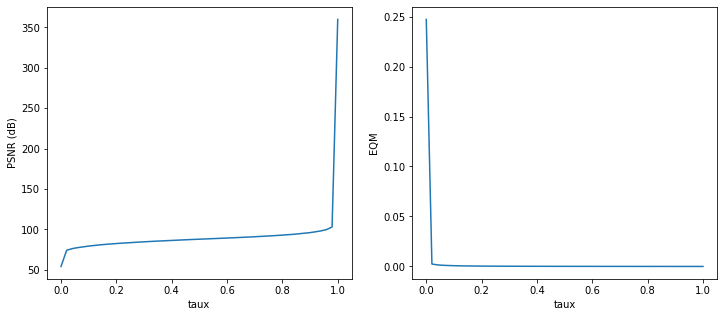

In [9]:
Delta = 255;
taux = linspace(0,1,50)
EQM = zeros(taux.shape)
PSNR = zeros(taux.shape)
Px = norm(x)**2 / (M*N)

from numpy import sqrt

for i, t in enumerate(taux):
    
    C = sqrt(t*M*N)
    C = round(C).astype(int)
    
    # Compression
    Y = X;
    Mask = zeros(Y.shape)
    Mask[:C,:C] = 1
    Z = Y*Mask
    z = idctn(Z, norm='ortho')
    
    # Différence entre les deux images
    b = z - x
    
    # EQM
    EQM[i] = norm(b)**2 / (M*N);
    
    # PSNR
    PSNR[i] = 10*log10(Delta**2/EQM[i])
    
    # Taux de compression
#     taux[i] = 1-count_nonzero(Mask)/(M*N)

# Affichage
figure(figsize=(12,5))
subplot(1,2,1)
plot(taux,PSNR)
xlabel('taux')
ylabel('PSNR (dB)')
subplot(1,2,2)
plot(taux,EQM)
xlabel('taux')
ylabel('EQM')

L'analyse des courbes permet d'aboutir aux conclusions suivantes.
* Plus le PSNR est grand, meilleure est la qualité de l'image :
  il est donc logique qu'il augmente lorsque le taux de compression augmente.
* À l'inverse, l'EQM mesure la différence entre l'image compressée et l'image originale :
  lorsque le taux de compression augmente, la différence devient de plus en plus faible.
* Pour des taux de compression très GRANDS, une petite variation du taux implique une variation rapide du PSNR :
  il chute rapidement. Cela dit, leurs valeurs restent supérieures à 80 dB,
  ce qui correspond tout de même à une très bonne qualité.

Dans une compression classique JPEG, la DCT n'est pas directement calculée sur toute l'image, mais sur des imagettes de taille 8×8, comme cela est fait dans [ce notebook](http://miv.u-strasbg.fr/mazet/ofti/correcs/tp5ex3.html).

Outils fondamentaux en traitement d'images – Université de Strasbourg 2019 – [vincent.mazet@unistra.fr](mailto:vincent.mazet@unistra.fr)

## TP 5 – exercice 2 : compression d'image avec perte (imagettes de 8×8)

In [1]:
from math import pi, log10

from numpy import zeros, log, absolute, linspace, meshgrid, count_nonzero
from numpy.linalg import norm

from scipy.fftpack import dctn, idctn

from skimage.io import imread
from skimage.color import rgb2gray

from matplotlib.pyplot import figure, imshow, show, subplot, title, plot, xlabel, ylabel #, , , show, plot, axis, axis

In [2]:
x = imread("lena.tiff")
x = rgb2gray(x)
(M, N) = x.shape

L'image est découpée en blocs de 8×8 pixels, sur lesquels est calculée la DCT dont les hautes fréquences sont ensuite annulées. Le rayon du masque binaire doit donc être ajusté en conséquence. Pour mettre en évidence l'effet de bloc qui peut apparaître lorsque la compression est très forte, le rayon est petit par rapport à la taille des imagettes.

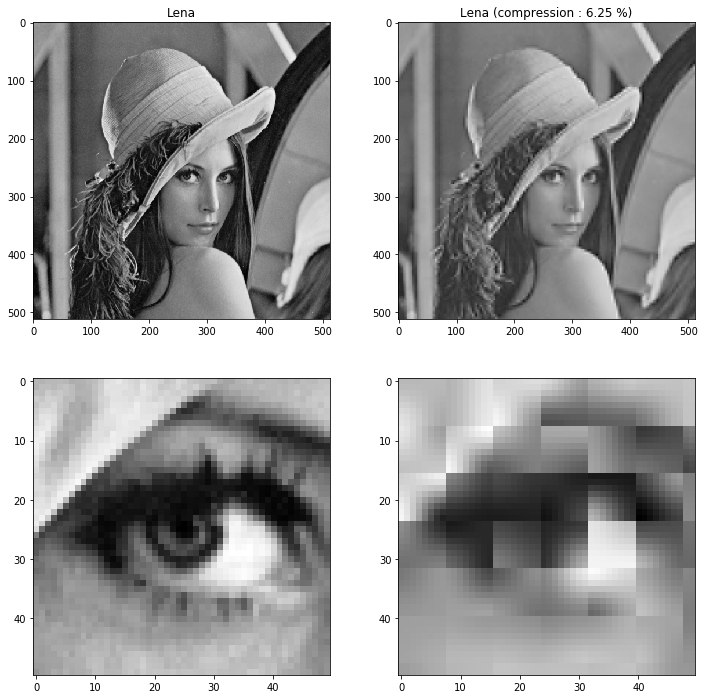

In [3]:
C = 2

B = 8
z = zeros(x.shape)

X = dctn(x, norm='ortho')

for m in range(round(M/B)):
    for n in range(round(N/B)):
        m1 = m*B
        m2 = (m+1)*B
        n1 = n*B
        n2 = (n+1)*B
        y = x[m1:m2,n1:n2]
        ###############################
        ###############################
        ###############################
        ###############################
        ###############################
        # [Hugo] Attention : ej en fais pas une copie ici !
        # Or la copie n'est pas faite sans ".copy()" par exemple:
        # Y est juste une référence sur X. Mais c'est sans conséquence dans le code car finalement Y n'est pas modifée
        Y = dctn(y, norm='ortho')
        b = linspace(0, B, B)
        Mask = zeros(Y.shape)
        Mask[:C,:C] = 1
        Z = Y*Mask
        z[m1:m2,n1:n2] = idctn(Z, norm='ortho')

taux = (C*C) / (B*B)

# Affichage
figure(figsize=(12,12))
subplot(2,2,1)
imshow(x, cmap='gray')
title('Lena')
subplot(2,2,2)
imshow(z, cmap='gray')
title('Lena (compression : {:.2f} %)'.format(taux*100))
subplot(2,2,3)
imshow(x[240:290,240:290], cmap='gray')
subplot(2,2,4)
imshow(z[240:290,240:290], cmap='gray')
show()

Outils fondamentaux en traitement d'images – Université de Strasbourg 2019 – [vincent.mazet@unistra.fr](mailto:vincent.mazet@unistra.fr)